# Test methods to draw samples from the posterior (and prior) distributions

In [1]:
from oceanoi import cov, oi, driveroi
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

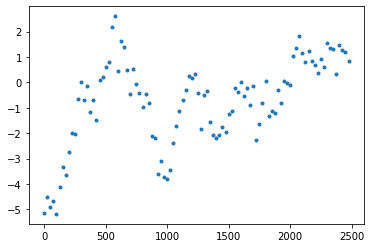

In [2]:
np.random.seed(1) # this generates the same output every time
# Generate some training data

####
# Change these parameters here
noise = 0.5
η = 1.5
ℓ = 100
covfunc = cov.expquad_1d
####

covparams = (η, ℓ)


dx = 25.
N = 100
xd = np.arange(0,dx*N,dx)
xo = np.linspace(-10*dx,dx*N+dx*10,N*10)

K = covfunc(xd[:,None], xd[:,None].T, covparams)


mu = np.zeros_like(xd)
yd = np.random.multivariate_normal(mu.ravel(), K, 1).ravel()
yd += noise*np.random.normal(size=(N,))
yd.shape
plt.figure()
plt.plot(xd, yd,'.')

In [3]:
# Sample from the posterior

scale = 1

OI = oi.OptimalInterp1D(xd*scale,  \
                            xo*scale,\
                            noise, covfunc, covparams)

samples = 500

y_posterior = OI.sample_posterior(yd[:,None], samples)

# # Predict the mean
# ymu = OI(yd[:,None])

# # Predict the covariance
# Σ = OI.calc_err(diag=False)

# y_posterior = np.random.multivariate_normal(ymu.ravel(), Σ, samples)

# y_posterior.shape


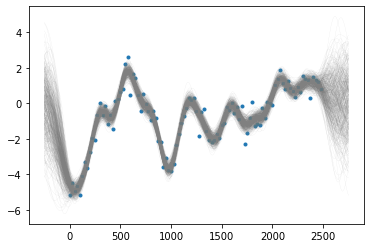

In [4]:
plt.figure()
plt.plot(xd, yd,'.')
for ii in range(samples):
    plt.plot(xo*scale, y_posterior[ii,:],'0.5',lw=0.2, alpha=0.2)

In [7]:
# Sample from the prior
# OI = oi.OptimalInterp1D(xd*scale,  \
#                             xo*scale,\
#                             noise, covfunc, covparams)

# samples = 500

# y_prior = np.random.multivariate_normal(np.zeros((OI.N,)), OI.Kdd, samples)

y_prior = OI.sample_prior(samples)

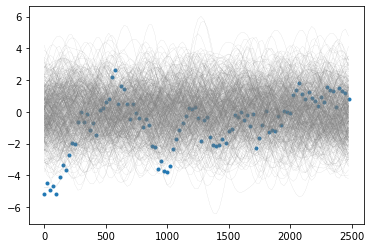

In [8]:
plt.figure()
plt.plot(xd, yd,'.')
for ii in range(samples):
    plt.plot(xd, y_prior[ii,:],'0.5',lw=0.2, alpha=0.4)